# 数据分析与挖掘的一般过程

## 数据分析的过程

1. 需求分析与问题定义
    - 分析的目的，以及需要解决的问题
2. 数据采集
    - 企业内部信息化系统数据
    - 网络爬取的数据
    - 第三方数据
3. 数据预处理
    - 数据清洗
4. 数据分析
    - 数据计算
    - 数据展示与数据可视化
5. 数据报告
    - 数据分析总结与结果呈现。

## 数据挖掘的过程

- 数据挖掘可以看成数据分析的一部分
    1. 数据集选取
    2. 数据预处理
        - 数据清洗与缺失值处理
        - 特征工程
        - 数据变换
    3. 算法分析
    4. 算法模型报告

## 数据挖掘相关技术

- 数据预处理技术
    - 数据清洗：Pandas与Numpy
    - 特征工程：sklearn
    - 数据变换：sklearn
    - 算法分析：sklearn

# sklearn六大模块介绍
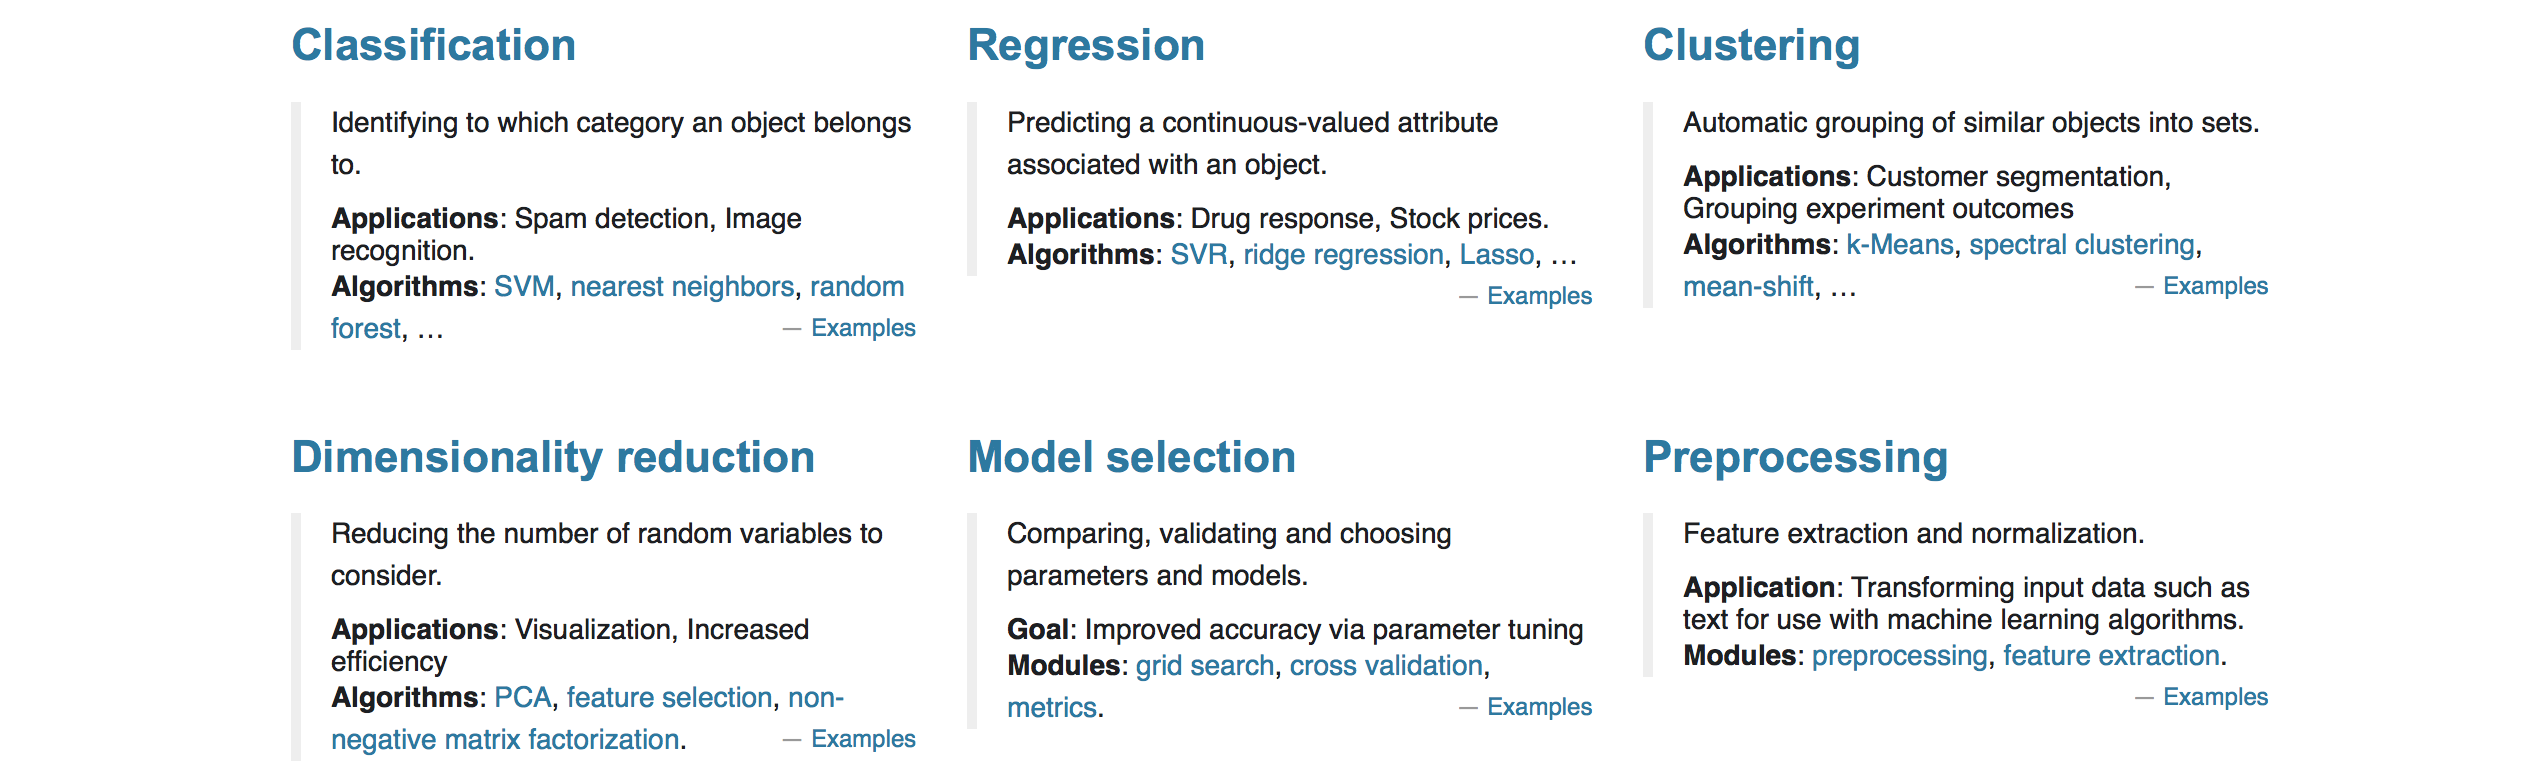

## 分类模块

1. 逻辑回归算法
2. SVM
3. KNN
4. 朴素贝叶斯
    - 高斯
    - 多项式
    - 伯努利
5. 决策树
6. 集成学习
    1. Bagging
    2. AdaBoosting
    3. GBDT(Gradient Boosting Decision Tree)
    4. Voter
    5. XGBoost(第三方)
    
7. NN（神经网络）

## 回归模块

1. 线性回归：
    1. Ridge回归
    2. LASSO回归
    3. 局部加权回归（不在sklearn）
2. SVR
3. 决策树
4. 集成学习
5. 神经网络（NN）

## 聚类模块

1. K-Means

## 降维模块

- PCA降维

## 模型选择模块

- 交叉验证
- 模型评估
- 网格最优搜索
- 模型持久化
- 验证曲线

## 预处理模块

1. 标准化
2. 规范化
3. 编码分类特征
4. 离散化
5. 缺失值插补


## 其他

1. 数据集
    - 人脸数据集等。

# 模型选择


## 最优参数搜索

- 最优参数搜索分成两种
    - 通用：网格最优参数搜索
    - 特殊：特殊算法最优参数搜索（这里不介绍，与网格最优搜索一样的使用，因为原理都差不多，只是争对的是特殊的算法与学习器）

### GridSearchCV

```python
    class sklearn.model_selection.GridSearchCV(
        estimator,    # 学习器
        param_grid,    # 学习器的参数（参数会被网格化测试）
        scoring=None, 
        n_jobs=None, 
        iid=’warn’,        # 最优评估标准（True使用测试样本数作为权重）
        refit=True, 
        cv=’warn’,       # 指定交叉验证的折数（K-Fold）
        verbose=0, 
        pre_dispatch=‘2*n_jobs’, 
        error_score=’raise-deprecating’, 
        return_train_score=False)
```

In [12]:
import sklearn.datasets as ds 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegressionCV

data, target = ds.load_iris(return_X_y=True)
data_train, data_test, target_train, target_test = train_test_split(data, target, test_size=0.2, random_state=42)

classifier = LogisticRegressionCV(Cs=10, cv=5, multi_class='multinomial',solver='sag',max_iter=100000)
classifier = classifier.fit(data_train, target_train)
pre = classifier.predict(data_test)
print((pre == target_test).sum(), ':', len(data_test))

print(classifier.C_)   # 返回最好得分的C参数

30 : 30
[21.5443469 21.5443469 21.5443469]


### LogisticRegressionCV参数最优

```python
    class sklearn.linear_model.LogisticRegressionCV(
        Cs=10, 
        fit_intercept=True, 
        cv=’warn’, 
        dual=False, 
        penalty=’l2’, 
        scoring=None, 
        solver=’lbfgs’, 
        tol=0.0001, 
        max_iter=100, 
        class_weight=None, 
        n_jobs=None, 
        verbose=0, 
        refit=True, 
        intercept_scaling=1.0, 
        multi_class=’warn’, 
        random_state=None, 
        l1_ratios=None)
```



In [13]:
import sklearn.datasets as ds 
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

data, target = ds.load_iris(return_X_y=True)
data_train, data_test, target_train, target_test = train_test_split(data, target, test_size=0.2, random_state=42)

param_grid = {
    'C': [1000, 5000, 10000, 50000, 100000],
    'gamma': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.1],
}
classifier = GridSearchCV(SVC(kernel='rbf'), param_grid, iid=True, cv=4) # iid与cv需要显式指定

classifier = classifier.fit(data_train, target_train)
pre = classifier.predict(data_test)
print((pre == target_test).sum(), ':', len(data_test))
classifier.best_estimator_   # 参考文档，还有其他参数

30 : 30


SVC(C=1000, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

## 模型评估

### 模型评估的基本概念

#### 理解分类评估的背景

1. 在分类的情况下，假设分类是A，B两类，容易产生4种情况：
    1. 分类正确
        - A类识别为A类
        - B类识别为B类
    2. 分类错误
        - A类识别为B类
        - B类识别为A类

2. 如果记A为正方P，B为负方N，识别正确为T，识别错误为F，则四种情况可以表示为：
    1. 分类正确
        - TP
        - TN
    2. 分类错误
        - FP
        - FN
3. **说明:**
    - 如果是多类的情况，问题更加复杂点，P与N就是多重种情况    
    

#### 准确率, 精确率,召回率

1. 准确率(Accuracy)：所以识别准确的比率
    - 经常也称正确率，就是我们前面最常用的评估标准。
    - $准确率= \dfrac{识别正确的样本}{总得样本}$
    - 使用上面的符号表示,准确率=$\dfrac{TP + TN}{TP + TN + FP + FN}$

2. 精确率(Precision)：某类中识别正确的比率
    - 也称精准率， 精确率就是每一类识别正确的比率，用来度量某类样本的分类正确率。
    - $准确率= \dfrac{A类识别正确的样本}{A类的所有样本}$
    - 使用上面符号表示，精确率=$\dfrac{TP}{TP + FP}$

3. 召回率（Recall）：识别为A类中的正确的比率
    - 也称查全率，识别为A类的样本中正确的比率；
    - $召回率= \dfrac{A类识别正确的样本}{识别为A类的样本}$
    - 使用上面符号表示，召回率= $\dfrac{TP}{TP + FN}$

- 说明
    - 召回率可以评估误识的情况，A类全部识别正确的情况无法评估好坏，因为存在把B类识别为A类的情况。

#### F1-Score

- 精确度和召回率之间是矛盾的，这里引入F1-Score作为综合指标，就是为了平衡准确率和召回率的影响，较为全面地评价一个分类器。F1是精确率和召回率的调和平均： 
    - $\dfrac{2}{F1}= \dfrac{1}{Recall} + \dfrac{1}{Precision}$
    - F1-Score的取值范围从0到1的，1代表模型的输出最好，0代表模型的输出结果最差。

### 分类报告

- 就是对预测结果与期望标签的一种统计计算结果-比率形式。
- sklearn提供函数计算准确率，精确率，召回率，F1-Score的计算。

#### classification_report函数说明

```python
sklearn.metrics.classification_report(
    y_true,                        # 标签值
    y_pred,                       # 预测值
    labels=None,                # 标签索引（这个标签与上面的标签含义不同） 
    target_names=None,     # 标签名
    sample_weight=None,    # 指定样本权重，一般不会指定
    digits=2,                      # 小数点位数
    output_dict=False)        # 输出方式是否为字典
```

#### 例子代码

In [20]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# cls_report = classification_report(target_test, pre, labels=[1, 2, 3])
cls_report = classification_report(target_test, pre, target_names=['A类', 'B类', 'C类'])
print(cls_report)


              precision    recall  f1-score   support

          A类       1.00      1.00      1.00        10
          B类       1.00      1.00      1.00         9
          C类       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



### 混淆矩阵
- 就是TP，FP，TN，FN的一个矩阵表示，通常使用分类报告看更加清楚，混淆矩阵数据是统计数据，不是比率。
- sklearn提供函数统计TP，FP，TN，FN。

#### confusion_matrix函数说明

```python
    sklearn.metrics.confusion_matrix(
        y_true, 
        y_pred, 
        labels=None, 
        sample_weight=None)
```

#### 例子代码

In [15]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
con_matrix = confusion_matrix(target_test, pre)
print(con_matrix)

[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


### 准确率

```python
    sklearn.metrics.accuracy_score(
        y_true, 
        y_pred, 
        normalize=True,     # 比率形式
        sample_weight=None)
```


In [18]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
acc_score = accuracy_score(target_test, pre)
print(acc_score)

1.0


- 学习器的score函数
    - 在sklearn的每个学习器都有一个score函数，返回给定测试数据和标签的平均精度。
    - `score(self, X, y, sample_weight=None)`

In [25]:
import sklearn.datasets as ds 
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

data, target = ds.load_iris(return_X_y=True)
data_train, data_test, target_train, target_test = train_test_split(data, target, test_size=0.2, random_state=42)

param_grid = {
    'C': [1000, 5000, 10000, 50000, 100000],
    'gamma': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.1],
}
classifier = GridSearchCV(SVC(kernel='rbf'), param_grid, iid=True, cv=4) # iid与cv需要显式指定

classifier = classifier.fit(data_train, target_train)
pre = classifier.predict(data_test)

# score函数（后面介绍）
score = classifier.score(data_train, target_train)
print('学习器的score函数：', acc_score)   # 训练样本
# accuracy_score
acc_score = accuracy_score(target_test, pre)  # 测试样本
print('accuracy_score函数：', acc_score)


学习器的score函数： 0.9666666666666667
accuracy_score函数： 1.0


### ROC曲线

- ROC曲线仅适用于二分类问题，下面都是基于二分类说明。

#### 与ROC相关的概念

1. 真正类率(True Postive Rate)TPR: 
    - $\dfrac{TP}{(TP + FN)}$
    - 代表分类器预测的正类中实际正实例占所有正实例的比例。Sensitivity(灵敏度)

2. 负正类率(False Postive Rate)FPR:
    - $\dfrac{FP}{(FP+TN)}$
    - 代表分类器预测的正类中实际负实例占所有负实例的比例。1-Specificity（1 - 特意度）

3. 真负类率(True Negative Rate)TNR: 
    - $\dfrac{TN}{(FP+TN)}$
    - 代表分类器预测的负类中实际负实例占所有负实例的比例，TNR=1-FPR。Specificity（特意度）

4. ROC的概念
    1. roc曲线：接收者操作特征(receiveroperating characteristic),roc曲线上每个点反映着对同一信号刺激的感受性。
        - FPR：横轴：负正类率(false postive rate FPR)特异度，划分实例中所有负例占所有负例的比例；(1-Specificity)
        - TPR：纵轴：真正类率(true postive rate TPR)灵敏度，Sensitivity(正类覆盖率)
        - ROC值：线上的点，划分正负类别的阈值

    2. 理解阈值：
        - 假设采用逻辑回归分类器，其给出针对每个实例为正类的概率，那么通过设定一个阈值如0.6，概率大于等于0.6的为正类，小于0.6的为负类。对应的就可以算出一组(FPR,TPR),在平面中得到对应坐标点。
        - 随着阈值的逐渐减小，越来越多的实例被划分为正类，但是这些正类中同样也掺杂着真正的负实例，即TPR和FPR会同时增大。阈值最大时，对应坐标点为(0,0),阈值最小时，对应坐标点(1,1)。
        - 线上每个点对应一个阈值。
    

#### ROC函数

```python
    sklearn.metrics.roc_curve(
        y_true, 
        y_score,     # 决策分类函数的输出值
        pos_label=None,     # 正分类标签值，比如0，或者1（对鸢尾花）
        sample_weight=None, 
        drop_intermediate=True)   # 返回的长度>=2
```

- 其中y_score是分类的阈值概率

#### ROC曲线绘制

[0.         0.         0.         0.08333333 0.08333333 0.16666667
 0.16666667 0.25       0.25       1.        ]
[0.    0.125 0.5   0.5   0.625 0.625 0.75  0.75  1.    1.   ]
[ 8.01257795  7.01257795  5.18476337  3.83217643  3.69592755  2.76251229
  2.49792708  2.48443851  0.96087507 -8.32110266]


<Figure size 432x288 with 0 Axes>

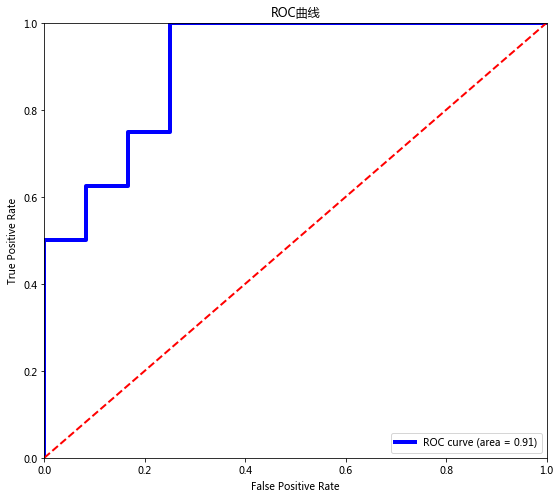

In [47]:
%matplotlib inline
import matplotlib.pyplot as plt
import sklearn.datasets as ds 
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, auc

data, target = ds.load_iris(return_X_y=True)

data = data[50:150]
target = target[0:100]

data_train, data_test, target_train, target_test = train_test_split(data, target, test_size=0.2, random_state=42)

classifier = SVC(kernel='rbf', C=1000, gamma=0.1, probability=True)

# 训练
classifier = classifier.fit(data_train, target_train)

y_test_score = classifier.decision_function(data_test)

fpr, tpr, thresholds = roc_curve(target_test, y_test_score, pos_label=1)
print(fpr)
print(tpr)
print(thresholds)

# -------------------------------------
roc_auc = auc(fpr,tpr)
#
plt.figure()
plt.figure(figsize = (9,8))
plt.plot(fpr, tpr, color=(0, 0, 1, 1), linewidth=4, label = 'ROC curve (area = %0.2f)' % roc_auc)
plt.plot( [0,1],[0,1], color=(1, 0, 0, 1), linewidth=2, linestyle = '--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC曲线')
plt.legend(loc="lower right")
plt.show()


#### AUC

- AUC(Area under Curve)：Roc曲线下的面积，介于0.1和1之间。Auc作为数值可以直观的评价分类器的好坏，值越大越好。
- AUC值是一个概率值，AUC值越大，说明能够更好地分类。

### score函数与r2_score函数

#### 理解相关系数与决定系数

- 这两个函数的计算公式如下：
    - $R^2(y, \hat{y}) = 1 - \frac{\sum_{i=1}^{n} (y_i - \hat{y}_i)^2}{\sum_{i=1}^{n} (y_i - \bar{y})^2}$
    - 其中$\bar{y} = \frac{1}{n} \sum_{i=1}^{n} y_i$

- $R^2$系数也称决定系数，也称为拟合优度。
    - 1 表示模型拟合度较好（也可能会是过拟合）

- $R$系数与$R^2$系数
    - $R$系数（相关系数）：两个特征向量的线性相关度。
    - $R^2$系数（决定系数）：用于对回归曲线的拟合度判定。

#### r2_score函数的使用

In [55]:
%matplotlib inline
import matplotlib.pyplot as plt
import sklearn.datasets as ds 
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, auc, r2_score


data, target = ds.load_iris(return_X_y=True)

data = data[50:150]
target = target[0:100]

data_train, data_test, target_train, target_test = train_test_split(data, target, test_size=0.2, random_state=42)

classifier = SVC(kernel='rbf', C=1000, gamma=0.1, probability=True)

# 训练
classifier = classifier.fit(data_train, target_train)

print('决定系数：', classifier.score(data_train, target_train))
pre = classifier.predict(data_train)
r2 = r2_score(target_train, pre)
print("R2决定系数：", r2)

# ----------------
print('-------------------')
print('决定系数：', classifier.score(data_test, target_test))
pre = classifier.predict(data_test)
r2 = r2_score(target_test, pre)
print("R2决定系数：", r2)

决定系数： 1.0
R2决定系数： 1.0
-------------------
决定系数： 0.85
R2决定系数： 0.3750000000000001


## 验证曲线图

### validation_curve函数

```python
    sklearn.model_selection.validation_curve(
        estimator, 
        X, y, 
        param_name, 
        param_range, 
        groups=None, 
        cv=’warn’, 
        scoring=None, 
        n_jobs=None, 
        pre_dispatch=’all’, 
        verbose=0, 
        error_score=’raise-deprecating’)
```

- 返回值
    - train_scores : array, shape (n_ticks, n_cv_folds)
        - 训练得分
    - test_scores : array, shape (n_ticks, n_cv_folds)
        - 验证得分

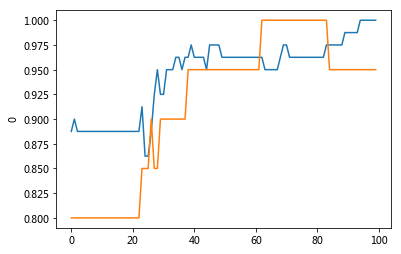

In [62]:
%matplotlib inline
import matplotlib.pyplot as plt
import sklearn.datasets as ds 
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, auc, r2_score
from sklearn.model_selection import validation_curve
import numpy as np
import seaborn as sns
import pandas as pd

data, target = ds.load_iris(return_X_y=True)

data = data[50:150]
target = target[0:100]

data_train, data_test, target_train, target_test = train_test_split(data, target, test_size=0.2, random_state=42)

classifier = SVC(kernel='rbf', C=1000, probability=True)

train_scores, valid_scores = validation_curve(classifier, data, target, "gamma", np.logspace(-7, 0, 100),  cv=5)

pd_train = pd.DataFrame(train_scores)
pd_valid = pd.DataFrame(valid_scores)

sns.lineplot(data=pd_train, x=pd_train.index, y=0)
sns.lineplot(data=pd_valid, x=pd_valid.index, y=0)

### learning_curve验证数据

```python
    sklearn.model_selection.learning_curve(
        estimator, 
        X, 
        y, 
        groups=None, 
        train_sizes=array([0.1, 0.33, 0.55, 0.78, 1. ]), 
        cv=’warn’, 
        scoring=None, 
        exploit_incremental_learning=False, 
        n_jobs=None, 
        pre_dispatch=’all’, 
        verbose=0, 
        shuffle=False, 
        random_state=None, 
        error_score=’raise-deprecating’)
```

## 模型持久化

- 利用python的序列化技术完成：
    - import pickle技术
        - 存储：s = pickle.dumps(clf)
        - 加载：clf2 = pickle.loads(s)
    - from joblib import dump, load 技术
        - 存储：dump(clf, 'filename.joblib') 
        - 加载：clf = load('filename.joblib') 

# 数据预处理

## 标准化Standardization

- 去中心化
- 方差归一

### scale函数说明

```python
    sklearn.preprocessing.scale(
        X, 
        axis=0, 
        with_mean=True, 
        with_std=True, 
        copy=True)
```

### 例子代码

In [64]:
from sklearn import preprocessing
import numpy as np
X_train = np.array(
    [
        [ 1., -1.,  2.],
        [ 2.,  0.,  0.],
        [ 0.,  1., -1.]
    ]
)
X_scaled = preprocessing.scale(X_train)
X_scaled                                          


array([[ 0.        , -1.22474487,  1.33630621],
       [ 1.22474487,  0.        , -0.26726124],
       [-1.22474487,  1.22474487, -1.06904497]])

In [70]:
# 可以测试
X_scaled.mean(axis=0)

array([0., 0., 0.])

In [72]:
X_scaled.std(axis=0)

array([1., 1., 1.])

### StandardScaler类说明

```python
    class sklearn.preprocessing.StandardScaler(
        copy=True, 
        with_mean=True, 
        with_std=True)
```

In [76]:
from sklearn import preprocessing
import numpy as np
X_train = np.array(
    [
        [ 1., -1.,  2.],
        [ 2.,  0.,  0.],
        [ 0.,  1., -1.]
    ]
)
scaler = preprocessing.StandardScaler()
scaler.fit(X_train)
data_scaled = scaler.transform(X_train)
data_scaled

array([[ 0.        , -1.22474487,  1.33630621],
       [ 1.22474487,  0.        , -0.26726124],
       [-1.22474487,  1.22474487, -1.06904497]])

## 规范化Normalization

- 规范化就是归一化，是将单个样本缩放为具有单位范数的过程

### normalize函数

```python
    sklearn.preprocessing.normalize(
        X, 
        norm=’l2’, 
        axis=1, 
        copy=True, 
        return_norm=False)
```

In [77]:
from sklearn.preprocessing import normalize
X_train = np.array(
    [
        [ 1., -1.,  2.],
        [ 2.,  0.,  0.],
        [ 0.,  1., -1.]
    ]
)
norm = normalize(X_train)
norm

array([[ 0.40824829, -0.40824829,  0.81649658],
       [ 1.        ,  0.        ,  0.        ],
       [ 0.        ,  0.70710678, -0.70710678]])

In [85]:
import numpy as np
X_train = np.array(
    [
        [ 1., -1.,  2.],
        [ 2.,  0.,  0.],
        [ 0.,  1., -1.]
    ]
)
y=np.linalg.norm(X_train, axis=1, keepdims=True)
print(X_train/y)

[[2.44948974]
 [2.        ]
 [1.41421356]]
[[ 0.40824829 -0.40824829  0.81649658]
 [ 1.          0.          0.        ]
 [ 0.          0.70710678 -0.70710678]]


### Normalizer类

```python
    class sklearn.preprocessing.Normalizer(
        norm=’l2’, 
        copy=True)
```

In [87]:
from sklearn import preprocessing
X_train = np.array(
    [
        [ 1., -1.,  2.],
        [ 2.,  0.,  0.],
        [ 0.,  1., -1.]
    ]
)

normalizer = preprocessing.Normalizer()
normalizer.fit(X_train)
norm = normalizer.transform(X_train)
norm

array([[ 0.40824829, -0.40824829,  0.81649658],
       [ 1.        ,  0.        ,  0.        ],
       [ 0.        ,  0.70710678, -0.70710678]])

##  分类特征编码

### 序数编码器OrdinalEncoder

- 把分类特征转换为序数
```python
    class sklearn.preprocessing.OrdinalEncoder(
        categories=’auto’, 
        dtype=<class ‘numpy.float64’>)
```

In [98]:
from sklearn import preprocessing
import sklearn.datasets as ds
import numpy as np
# data, target=ds.load_iris(return_X_y=True)

# 
# target = target.reshape((-1,1))
# enc = preprocessing.OrdinalEncoder()
# enc.fit(target)  
# enc.transform(target)
enc = preprocessing.OrdinalEncoder()
X = [
    ['male', 'from US', 'uses Safari'], 
    ['female', 'from Europe', 'uses Firefox'],
    ['A', 'from Europe', 'uses Firefox']
]
enc.fit(X)  
enc.transform(X)



array([[2., 1., 1.],
       [1., 0., 0.],
       [0., 0., 0.]])

### OneHotEncoder编码器
- 把序数特征转换为包含1的向量。

```python
    class sklearn.preprocessing.OneHotEncoder(
        n_values=None, 
        categorical_features=None,     # 分类
        categories=None, 
        drop=None, 
        sparse=True, 
        dtype=<class ‘numpy.float64’>, 
        handle_unknown=’error’)
```

In [113]:
from sklearn.preprocessing import  OneHotEncoder

enc = OneHotEncoder(categories='auto')
enc.fit([[0, 0, 3],
         [1, 1, 0],
         [0, 2, 1],
         [1, 0, 2]])

ans = enc.transform([[0, 1, 3]]).toarray()  # 如果不加 toarray() 的话，输出的是稀疏的存储格式，即索引加值的形式，也可以通过参数指定 sparse = False 来达到同样的效果
print(ans) 


[[1. 0. 0. 1. 0. 0. 0. 0. 1.]]


- 说明

```python
# 输出 [[ 1.  0.       0.  1.  0.       0.  0.  0.  1.]]
#             0               1                3
"""
对于输入数组，这依旧是把每一行当作一个样本，每一列当作一个特征，
1. 第一个特征，即第一列 [0,1,0,1],也就是说它有两个取值 0 或者 1，那么 one-hot 就会使用两位来表示这个特征，
    [1,0]表示 0， 
    [0,1]表示 1，

2. 第二个特征，第二列 [0,1,2,0]它有三种值，那么 one-hot 就会使用三位来表示这个特征，
    [1,0,0]表示 0， [0,1,0]表示 1，[0,0,1]表示 2，
"""
```

In [117]:
import sklearn.datasets as ds
import numpy as np
from sklearn.preprocessing import  OneHotEncoder

data, target=ds.load_iris(return_X_y=True)
enc = OneHotEncoder(categories='auto')
target = target.reshape((-1,1))
enc.fit(target)
ans = enc.transform(target[:2]).toarray()    # 可以多显示几个
ans

array([[1., 0., 0.],
       [1., 0., 0.]])

# 缺失值可视化处理-missingno

- 安装：
    - pip install missingno
 
    - 模块：import missingno as msno

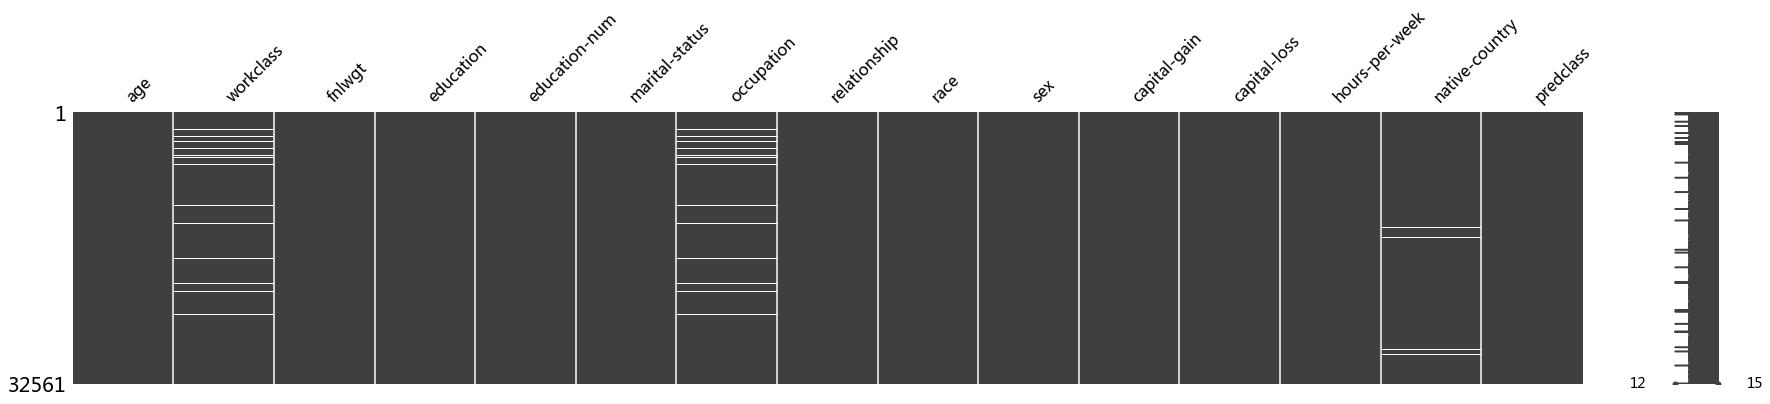

In [121]:
import pandas as pd
import missingno as msno

headers = ['age', 'workclass', 'fnlwgt', 
           'education', 'education-num', 
           'marital-status', 'occupation', 
           'relationship', 'race', 'sex', 
           'capital-gain', 'capital-loss', 
           'hours-per-week', 'native-country', 
           'predclass']
# 加载训练集
training_raw = pd.read_csv('adult.data', 
                       header=None, 
                       names=headers, 
                       sep=',\s', 
                       na_values=["?"], 
                       engine='python')
msno.matrix(training_raw, figsize = (30,5))